# Notebook for creating plots of reconstruced variables 


(116960, 2, 1)


TypeError: unsupported operand type(s) for /: 'str' and 'str'

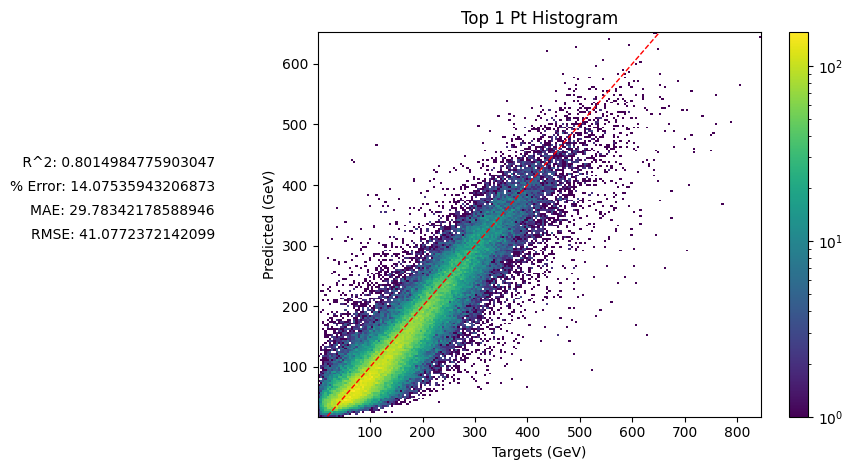

In [ ]:
from pathlib  import Path
import h5py
import joblib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from src.data_utls.scalers import *
from src.utils.utils import generate_reconstruction_report
import joblib
from matplotlib.colors import LogNorm

generate_reconstruction_report(
    "../lightning_logs/version_88/test_outputs.h5",
    Path("../test_report/"),
    "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/processed_data_interaction_with_W/target_transforms.joblib",
    raw_predict_file_path= "/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/h5py_data/ttbar_h5py_raw_test.h5"
)


In [3]:


with h5py.File("/mnt/iusers01/fse-ugpgt01/phy01/b58521jg/masters_project/introduction_work/transformers/data/topquarkreconstruction/h5py_data/ttbar_h5py_raw_train.h5", "r") as file:
    event = file["event"][()]      # shape (N, 2, 4)
    targets = file["targets"][()]


In [4]:
event_selection = (event[:, 2] == 1)
tops_event_selection = targets[event_selection]
top_quarks = (abs(tops_event_selection[..., 4]) == 6)
tops = tops_event_selection[top_quarks].reshape(-1,  2, 5)



In [6]:
import vector
top_vector = vector.array(
    { "pt": tops[..., 0] ,
     "eta":  tops[..., 1],
    "phi" : tops[..., 2],
    "mass": tops[..., 3]
    }
)

In [8]:
top_vector.M

array([[172.56822, 172.87167],
       [173.16565, 172.08492],
       [172.51305, 170.9251 ],
       ...,
       [171.38365, 172.77728],
       [170.90388, 173.48283],
       [172.47812, 171.78821]], dtype=float32)

(array([[  3482.,   6612.,  14635.,  49120., 947420., 987783.,  63334.,
          23229.,  12488.,   8128.],
        [  3451.,   6483.,  14745.,  49029., 947838., 987038.,  63604.,
          23409.,  12521.,   8113.]]),
 array([152.70196533, 156.66171265, 160.62145996, 164.58120728,
        168.54095459, 172.5007019 , 176.46046448, 180.42021179,
        184.37995911, 188.33970642, 192.29945374]),
 <a list of 2 BarContainer objects>)

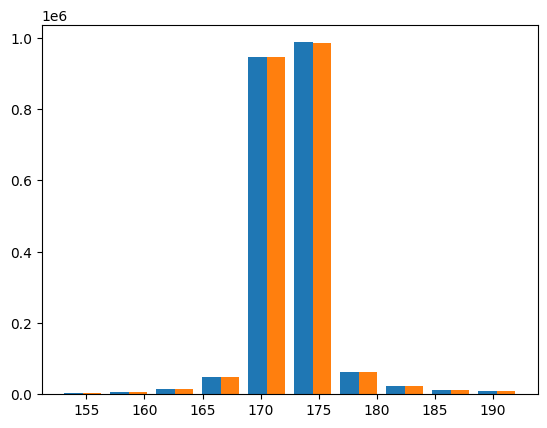

In [9]:
plt.hist(top_vector.M)